# House Price Prediction 

#### reading dataset

In [318]:
# importing basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [319]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
test_df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence  \
0            Lvl    AllPub  ...         120        0    NaN  MnPrv   
1            Lvl    AllPub  ...           0        0    NaN    NaN   
2            Lvl    AllPub  ...           0        0    NaN  MnPrv   
3            Lvl    AllPub  ...           0        0    NaN    NaN   
4            HLS    AllPub  ...         144        0    NaN    NaN   
...          ...       ...  ...         ...      ...    ...    ...   
1454         Lvl    AllPub  ...           0        0    NaN    NaN   
1455         Lvl    AllPub  ...           0        0    NaN    NaN   
1456         Lvl    AllPub  ...           0        0    NaN    NaN   
1457         Lvl    AllPub  ...           0        0    NaN  MnPrv   
1458         Lvl    AllPub  ...           0        0    NaN    NaN   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0            NaN       0      6    2010        WD         Normal  
1           Gar2   12500      6    2010        WD         Normal  
2            NaN       0      3    2010        WD         Normal  
3            NaN       0      6    2010        WD         Normal  
4            NaN       0      1    2010        WD         Normal  
...          ...     ...    ...     ...       ...            ...  
1454         NaN       0      6    2006        WD         Normal  
1455         NaN       0      4    2006        WD        Abnorml  
1456         NaN       0      9    2006        WD        Abnorml  
1457        Shed     700      7    2006        WD         Normal  
1458         NaN       0     11    2006        WD         Normal  

[1459 rows x 80 columns]

In [320]:
df = pd.concat([train_df, test_df], ignore_index =True)

In [321]:
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
2914  2915         160       RM         21.0     1936   Pave   NaN      Reg   
2915  2916         160       RM         21.0     1894   Pave   NaN      Reg   
2916  2917          20       RL        160.0    20000   Pave   NaN      Reg   
2917  2918          85       RL         62.0    10441   Pave   NaN      Reg   
2918  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
2914         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2915         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2916         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2917         Lvl    AllPub  ...        0    NaN  MnPrv        Shed     700   
2918         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal   208500.0  
1         5   2007        WD         Normal   181500.0  
2         9   2008        WD         Normal   223500.0  
3         2   2006        WD        Abnorml   140000.0  
4        12   2008        WD         Normal   250000.0  
...     ...    ...       ...            ...        ...  
2914      6   2006        WD         Normal        NaN  
2915      4   2006        WD        Abnorml        NaN  
2916      9   2006        WD        Abnorml        NaN  
2917      7   2006        WD         Normal        NaN  
2918     11   2006        WD         Normal        NaN  

[2919 rows x 81 columns]

In [322]:
y = df.SalePrice
df = df.drop("SalePrice", axis=1)

In [323]:
y_train = y[:1460]
y_train

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1460, dtype: float64

In [324]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [325]:
df_num = df.select_dtypes(np.number)
len(df_num)

2919

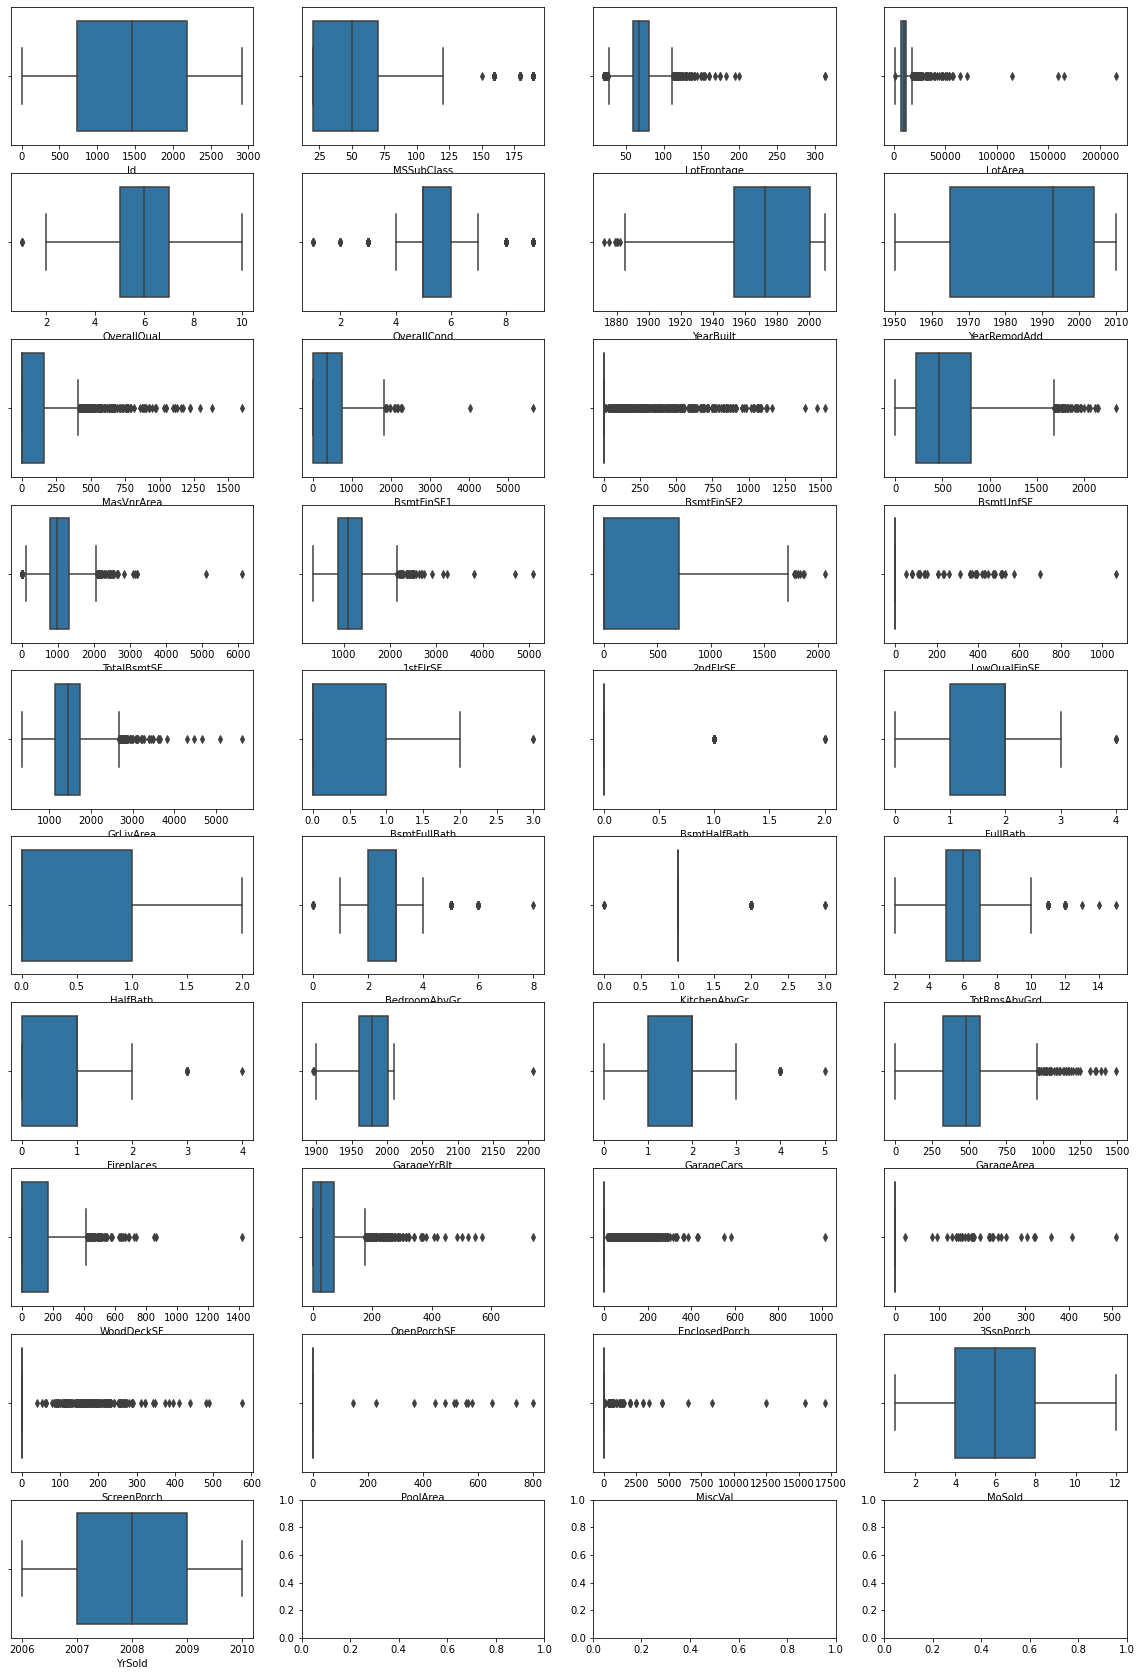

In [326]:
df_num = df.select_dtypes(np.number)

fig, ax = plt.subplots(nrows =10, ncols=4, figsize=(20, 30))
for i, subplot in zip(df_num.columns,  ax.flatten()):
    sns.boxplot(df[i], ax=subplot) 
    #in case of odd number of plots
plt.show()

In [327]:
len(df.select_dtypes(np.object).columns)

43

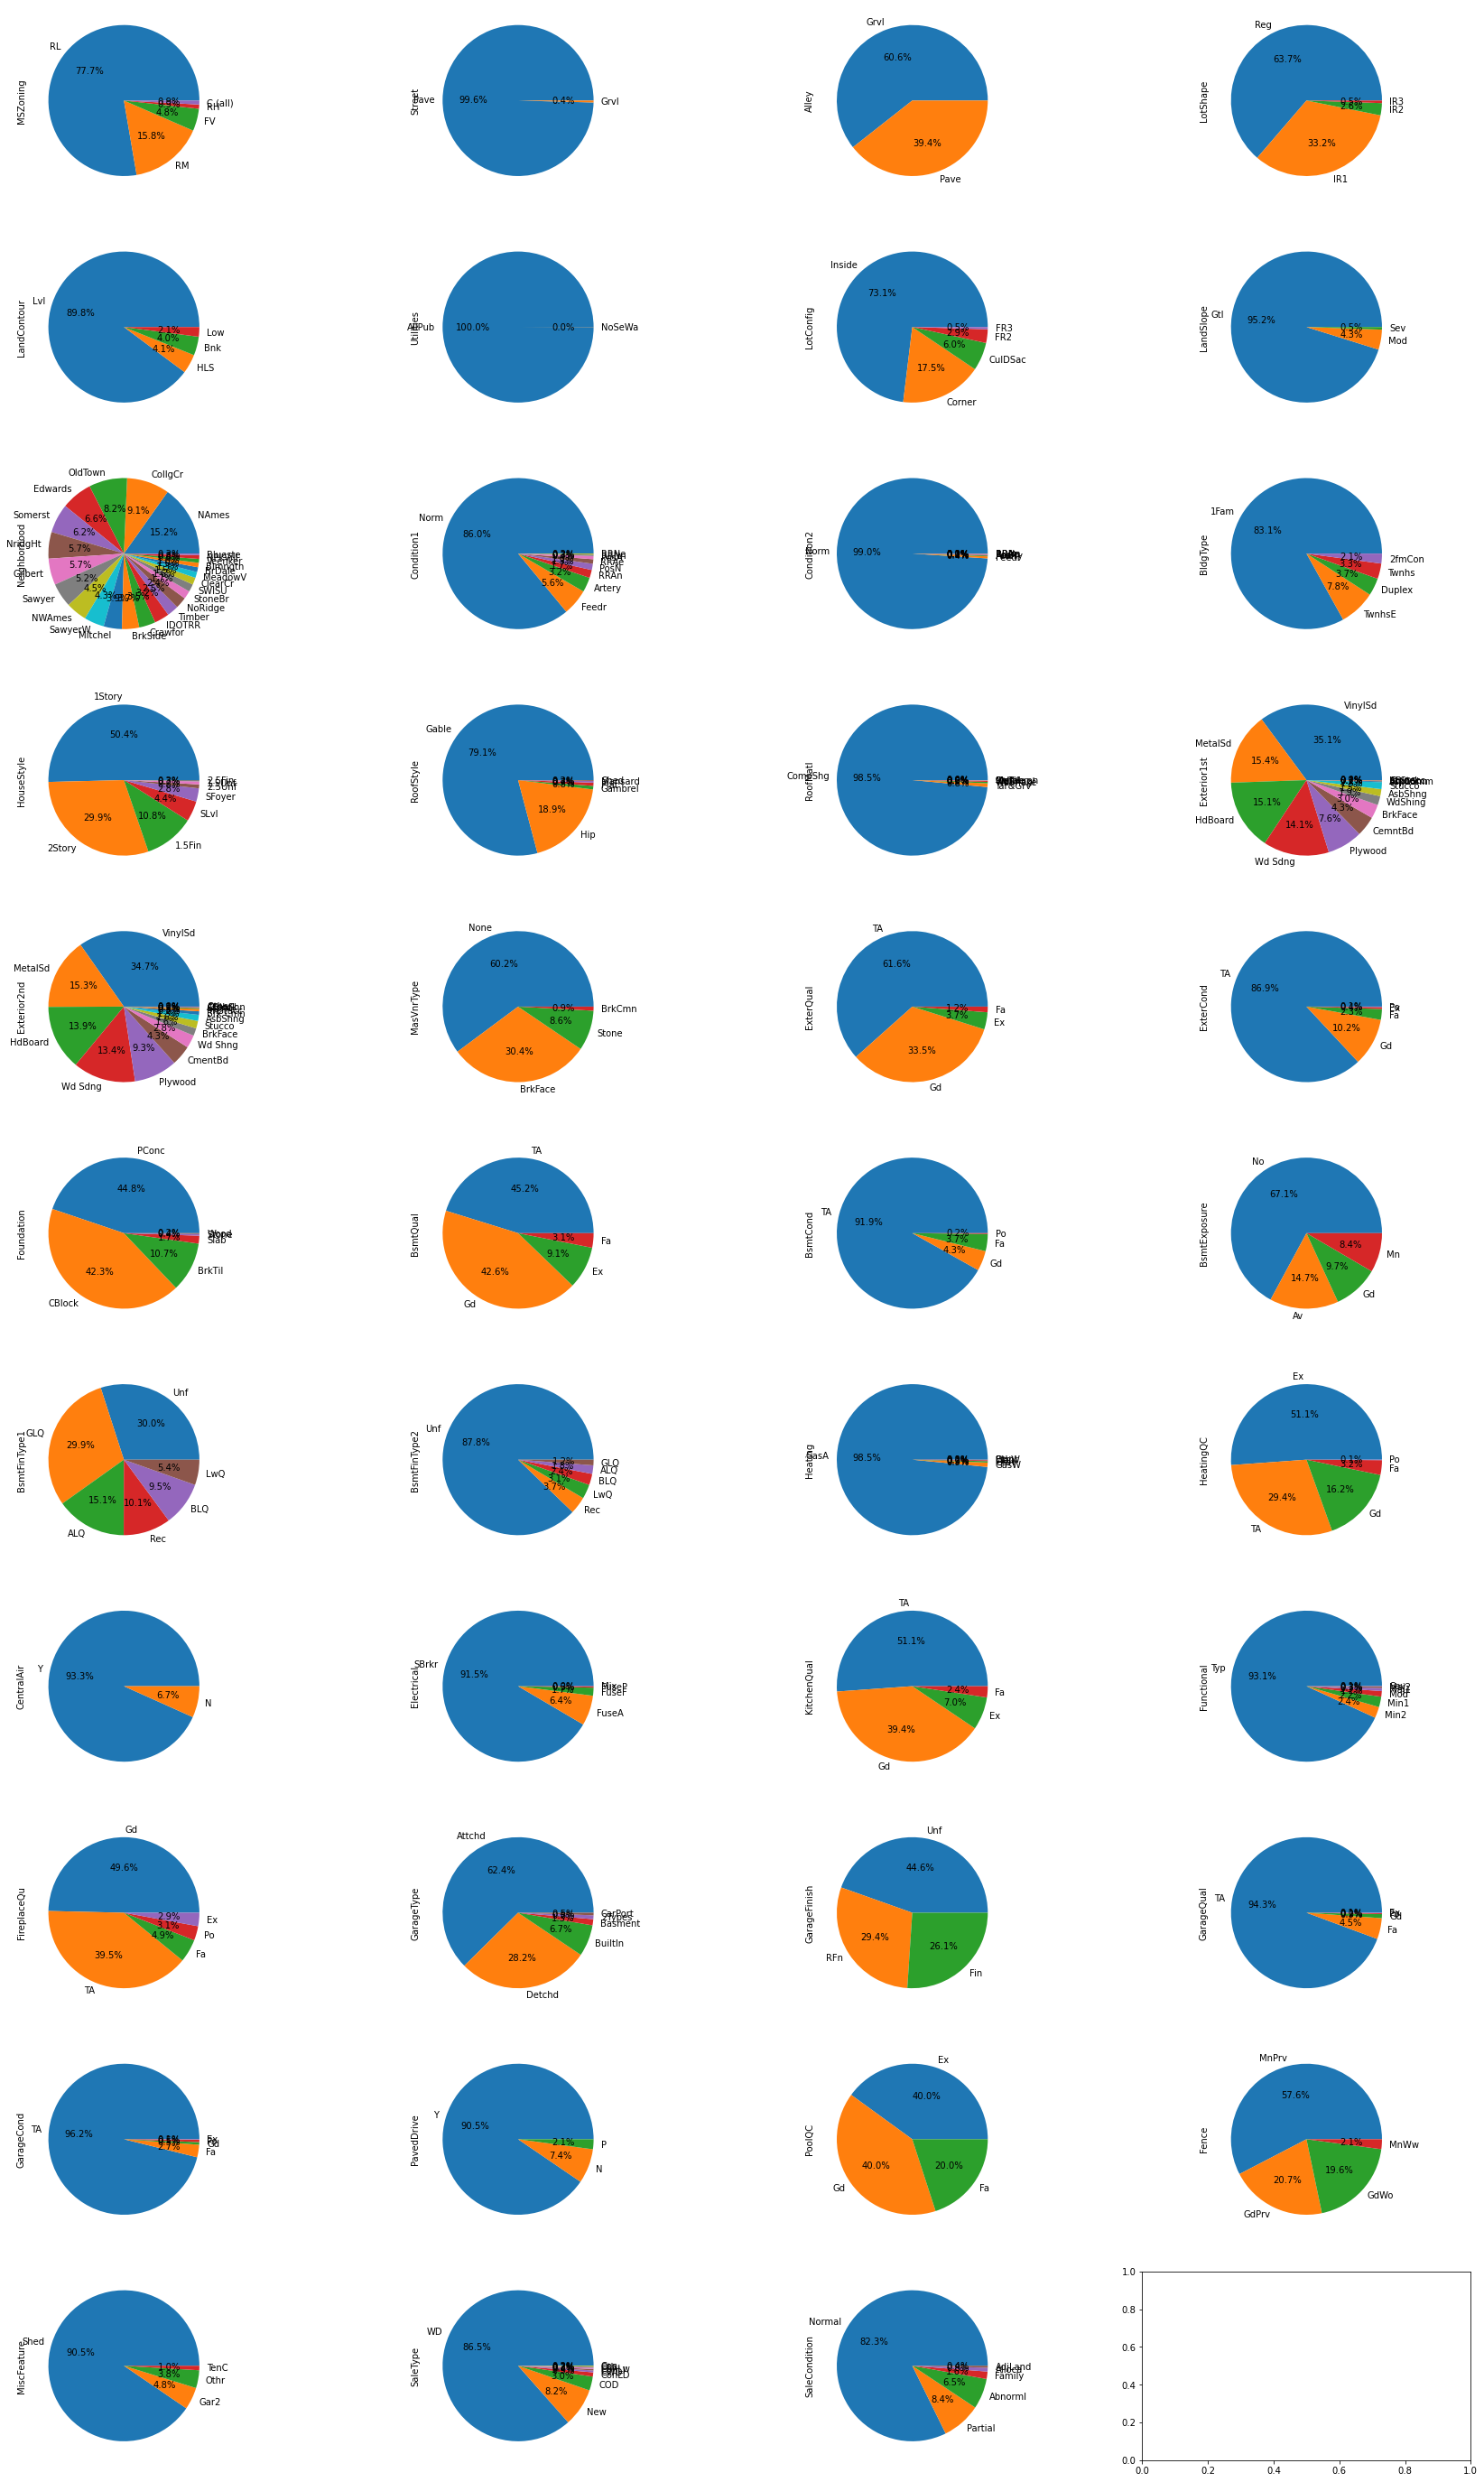

In [328]:
from matplotlib.pyplot import legend


df_cat = df.select_dtypes(np.object).columns
fig, ax = plt.subplots(nrows = 11, ncols=4, figsize=(30, 50))
for i, subplot in zip(df_cat, ax.flatten()):
    (pd.DataFrame(df[i].value_counts())).plot.pie(y = i, autopct= '%.1f%%', ax= subplot, legend= False)
plt.show()

# Missing Value Treatment

In [329]:
nullvaluesanalysis = pd.DataFrame(df.isnull().sum())
nullvaluesanalysis[nullvaluesanalysis [0] != 0].sort_values(0, ascending=False)

0
PoolQC        2909
MiscFeature   2814
Alley         2721
Fence         2348
FireplaceQu   1420
LotFrontage    486
GarageFinish   159
GarageQual     159
GarageCond     159
GarageYrBlt    159
GarageType     157
BsmtExposure    82
BsmtCond        82
BsmtQual        81
BsmtFinType2    80
BsmtFinType1    79
MasVnrType      24
MasVnrArea      23
MSZoning         4
BsmtFullBath     2
BsmtHalfBath     2
Functional       2
Utilities        2
GarageArea       1
GarageCars       1
Electrical       1
KitchenQual      1
TotalBsmtSF      1
BsmtUnfSF        1
BsmtFinSF2       1
BsmtFinSF1       1
Exterior2nd      1
Exterior1st      1
SaleType         1

In [330]:
# PoolQC = 1453
df.PoolQC.value_counts()

Ex    4
Gd    4
Fa    2
Name: PoolQC, dtype: int64

In [331]:
df.PoolQC = df.PoolQC.replace(np.nan, "NA")

In [332]:
# MiscFeature
df.MiscFeature = df.MiscFeature.replace(np.nan, "NA")

In [333]:
# Alley
df.Alley = df.Alley.replace(np.nan, "NA")

In [334]:
# Fence
df.Fence = df.Fence.replace(np.nan, "NA")

In [335]:
# FireplaceQu	
df.FireplaceQu = df.FireplaceQu.replace(np.nan, "NA")

In [336]:
# LotFrontage 
# Assuming it is depends on Lot Area
df.drop("LotFrontage", axis=1, inplace= True)

In [337]:
# Garage Variables

# GarageType
df.GarageType = df.GarageType.replace(np.nan, "NA")
# GarageYrBlt
df.drop("GarageYrBlt", axis=1, inplace= True) # most Garage yr blt are same as year house build

In [338]:
df.GarageFinish = df.GarageFinish.replace(np.nan, "NA")

In [339]:
len(df[df.GarageQual == df.GarageCond])

2610

In [340]:
df.GarageQual = df.GarageQual.replace(np.nan, "NA")


In [341]:
df.drop("GarageCond", axis=1, inplace= True)

In [342]:
df.BsmtExposure = df.BsmtExposure.replace(np.nan, "NA")

In [343]:
df.BsmtFinType1 = df.BsmtFinType1.replace(np.nan, "NA")

In [344]:
df.BsmtFinType2 = df.BsmtFinType2.replace(np.nan, "NA")

In [345]:
len(df[df.BsmtQual == df.BsmtCond])

1265

In [346]:
df.BsmtQual = df.BsmtQual.replace(np.nan, "NA")
df.BsmtCond = df.BsmtCond.replace(np.nan, "NA")

In [347]:
df.MasVnrArea = df.MasVnrArea.fillna(0)

In [348]:
df.MasVnrType.value_counts()

None       1742
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

In [349]:
df.MasVnrType = df.MasVnrType.fillna("None")

In [350]:
df.Electrical.value_counts()

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [351]:
df.Electrical = df.Electrical.fillna("SBrkr")

In [352]:
nullvaluesanalysis = pd.DataFrame(df.isnull().sum())
nullvaluesanalysis[nullvaluesanalysis [0] != 0].sort_values(0, ascending=False)

0
MSZoning      4
Utilities     2
BsmtFullBath  2
BsmtHalfBath  2
Functional    2
Exterior1st   1
Exterior2nd   1
BsmtFinSF1    1
BsmtFinSF2    1
BsmtUnfSF     1
TotalBsmtSF   1
KitchenQual   1
GarageCars    1
GarageArea    1
SaleType      1

In [353]:
df['MSZoning'] = df.MSZoning.replace(np.nan, "RL")
df['Utilities'] = df.Utilities.replace(np.nan, "AllPub")
df['BsmtFullBath'] = df.BsmtFullBath.replace(np.nan, 1)
df['BsmtHalfBath'] = df.BsmtHalfBath.replace(np.nan, 1)
df['Functional'] = df.Functional.replace(np.nan, "Mod")
df['Exterior1st'] = df.Exterior1st.replace(np.nan, "ImStucc")
df['Exterior2nd'] = df.Exterior2nd.replace(np.nan, "ImStucc")
df['BsmtFinSF1'] = df.BsmtFinSF1.replace(np.nan, np.mean(df['BsmtFinSF1']))
df['BsmtFinSF2'] = df.BsmtFinSF2.replace(np.nan, np.mean(df['BsmtFinSF2']))
df['BsmtUnfSF'] = df.BsmtUnfSF.replace(np.nan, np.mean(df['BsmtUnfSF']))
df['TotalBsmtSF'] = df.TotalBsmtSF.replace(np.nan, np.mean(df['TotalBsmtSF']))
df['KitchenQual'] = df.KitchenQual.replace(np.nan, "TA")
df['GarageCars'] = df.GarageCars.replace(np.nan, np.mean(df['GarageCars']))
df['GarageArea'] = df.GarageArea.replace(np.nan, np.mean(df['GarageArea']))
df['SaleType'] = df.SaleType.replace(np.nan, "COD")

In [354]:
nullvaluesanalysis = pd.DataFrame(df.isnull().sum())
nullvaluesanalysis[nullvaluesanalysis [0] != 0].sort_values(0, ascending=False)

Empty DataFrame
Columns: [0]
Index: []

In [355]:
# finding correlating between Numerical Variables

<AxesSubplot:>

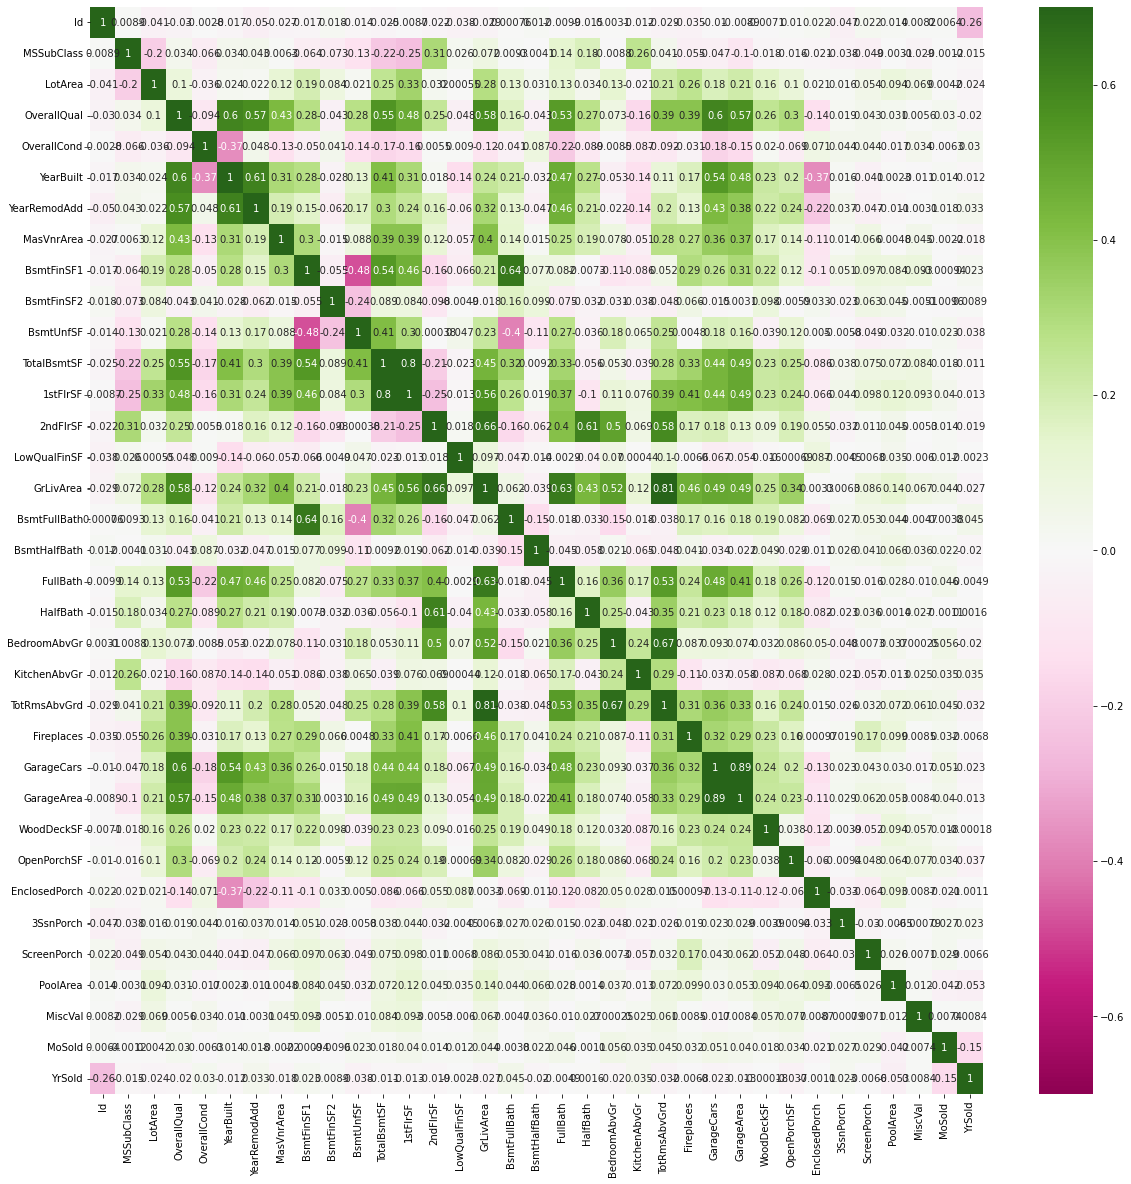

In [356]:
df_num = df.select_dtypes(np.number)
plt.figure(figsize=(20,20))
sns.heatmap(df_num.corr(), cmap= "PiYG", annot=True, vmin= -0.70, vmax= 0.70)

In [357]:
df['tbas'] = df.BsmtFinSF1 + df.BsmtFinSF2 + df.BsmtUnfSF

<AxesSubplot:>

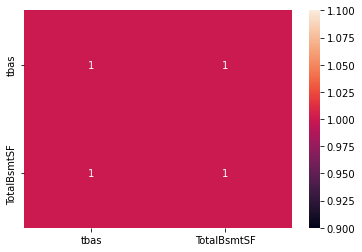

In [358]:
sns.heatmap((df[["tbas", "TotalBsmtSF"]]).corr(), annot=True)

In [359]:
# from the above plot we can see that TotalBsmtSF is sum of df.BsmtFinSF1 + df.BsmtFinSF2 + df.BsmtUnfSF
# thus dropping Total all the three columns becoz TotalBsmtSF is highly correlated with target variable

In [360]:
# Removing Multicollinear Columns
df.drop(['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF'], axis=1, inplace=True)

In [361]:
df.drop('TotRmsAbvGrd', axis=1, inplace=True)

In [362]:
df.drop('GarageCars', axis=1, inplace=True)

In [363]:
# Combining 1st floor and 2nd floor area 
df["totalabvgrdSF"] = df['1stFlrSF'] + df['2ndFlrSF'] 
df.drop(["1stFlrSF", "2ndFlrSF"], axis=1, inplace=True)

In [364]:
# totalabvgrdSF is equal to GrLivArea Thus we dropping totalabvgrdSF
df.drop('totalabvgrdSF', axis=1, inplace=True)

In [365]:
df.drop('tbas', axis=1, inplace=True)

<AxesSubplot:>

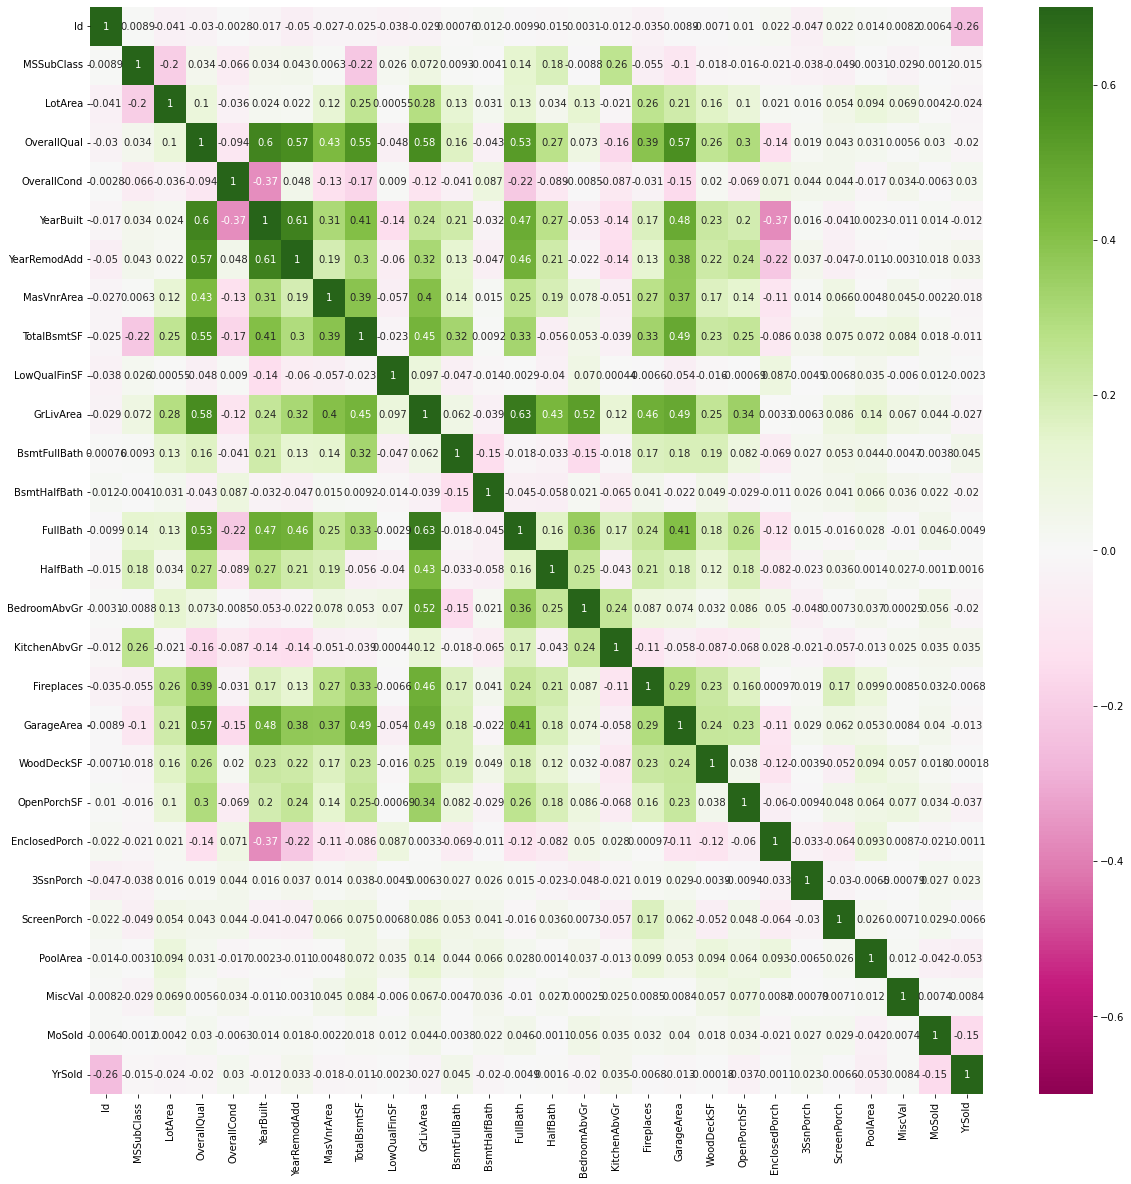

In [366]:
df_num = df.select_dtypes(np.number)
plt.figure(figsize=(20,20))
sns.heatmap(df_num.corr(), cmap= "PiYG", annot=True, vmin= -0.70, vmax= 0.70)

In [367]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 70, dtype: int64

In [368]:
# Correlation between Categorical variables
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder(categories= [["Ex", 'Gd', 'TA', 'Fa', 'Po']])
for i in ['ExterQual', "ExterCond", "HeatingQC", "KitchenQual"]:
 df[i] = oe.fit_transform(df[i].values.reshape(-1, 1))    

In [369]:
oe = OrdinalEncoder(categories= [["Ex", 'Gd', 'TA', 'Fa', 'Po', 'NA']])
for i in ['BsmtQual', "BsmtCond", "FireplaceQu", "GarageQual", "PoolQC"]:
 df[i] = oe.fit_transform(df[i].values.reshape(-1, 1))  

In [370]:
df_catvarscols = df.select_dtypes('object').columns

In [371]:
licatvarscols = list(df_catvarscols)

In [372]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in licatvarscols:
    df[i] = le.fit_transform(df[i])

In [373]:
len(df.select_dtypes('object').columns)

0

<AxesSubplot:>

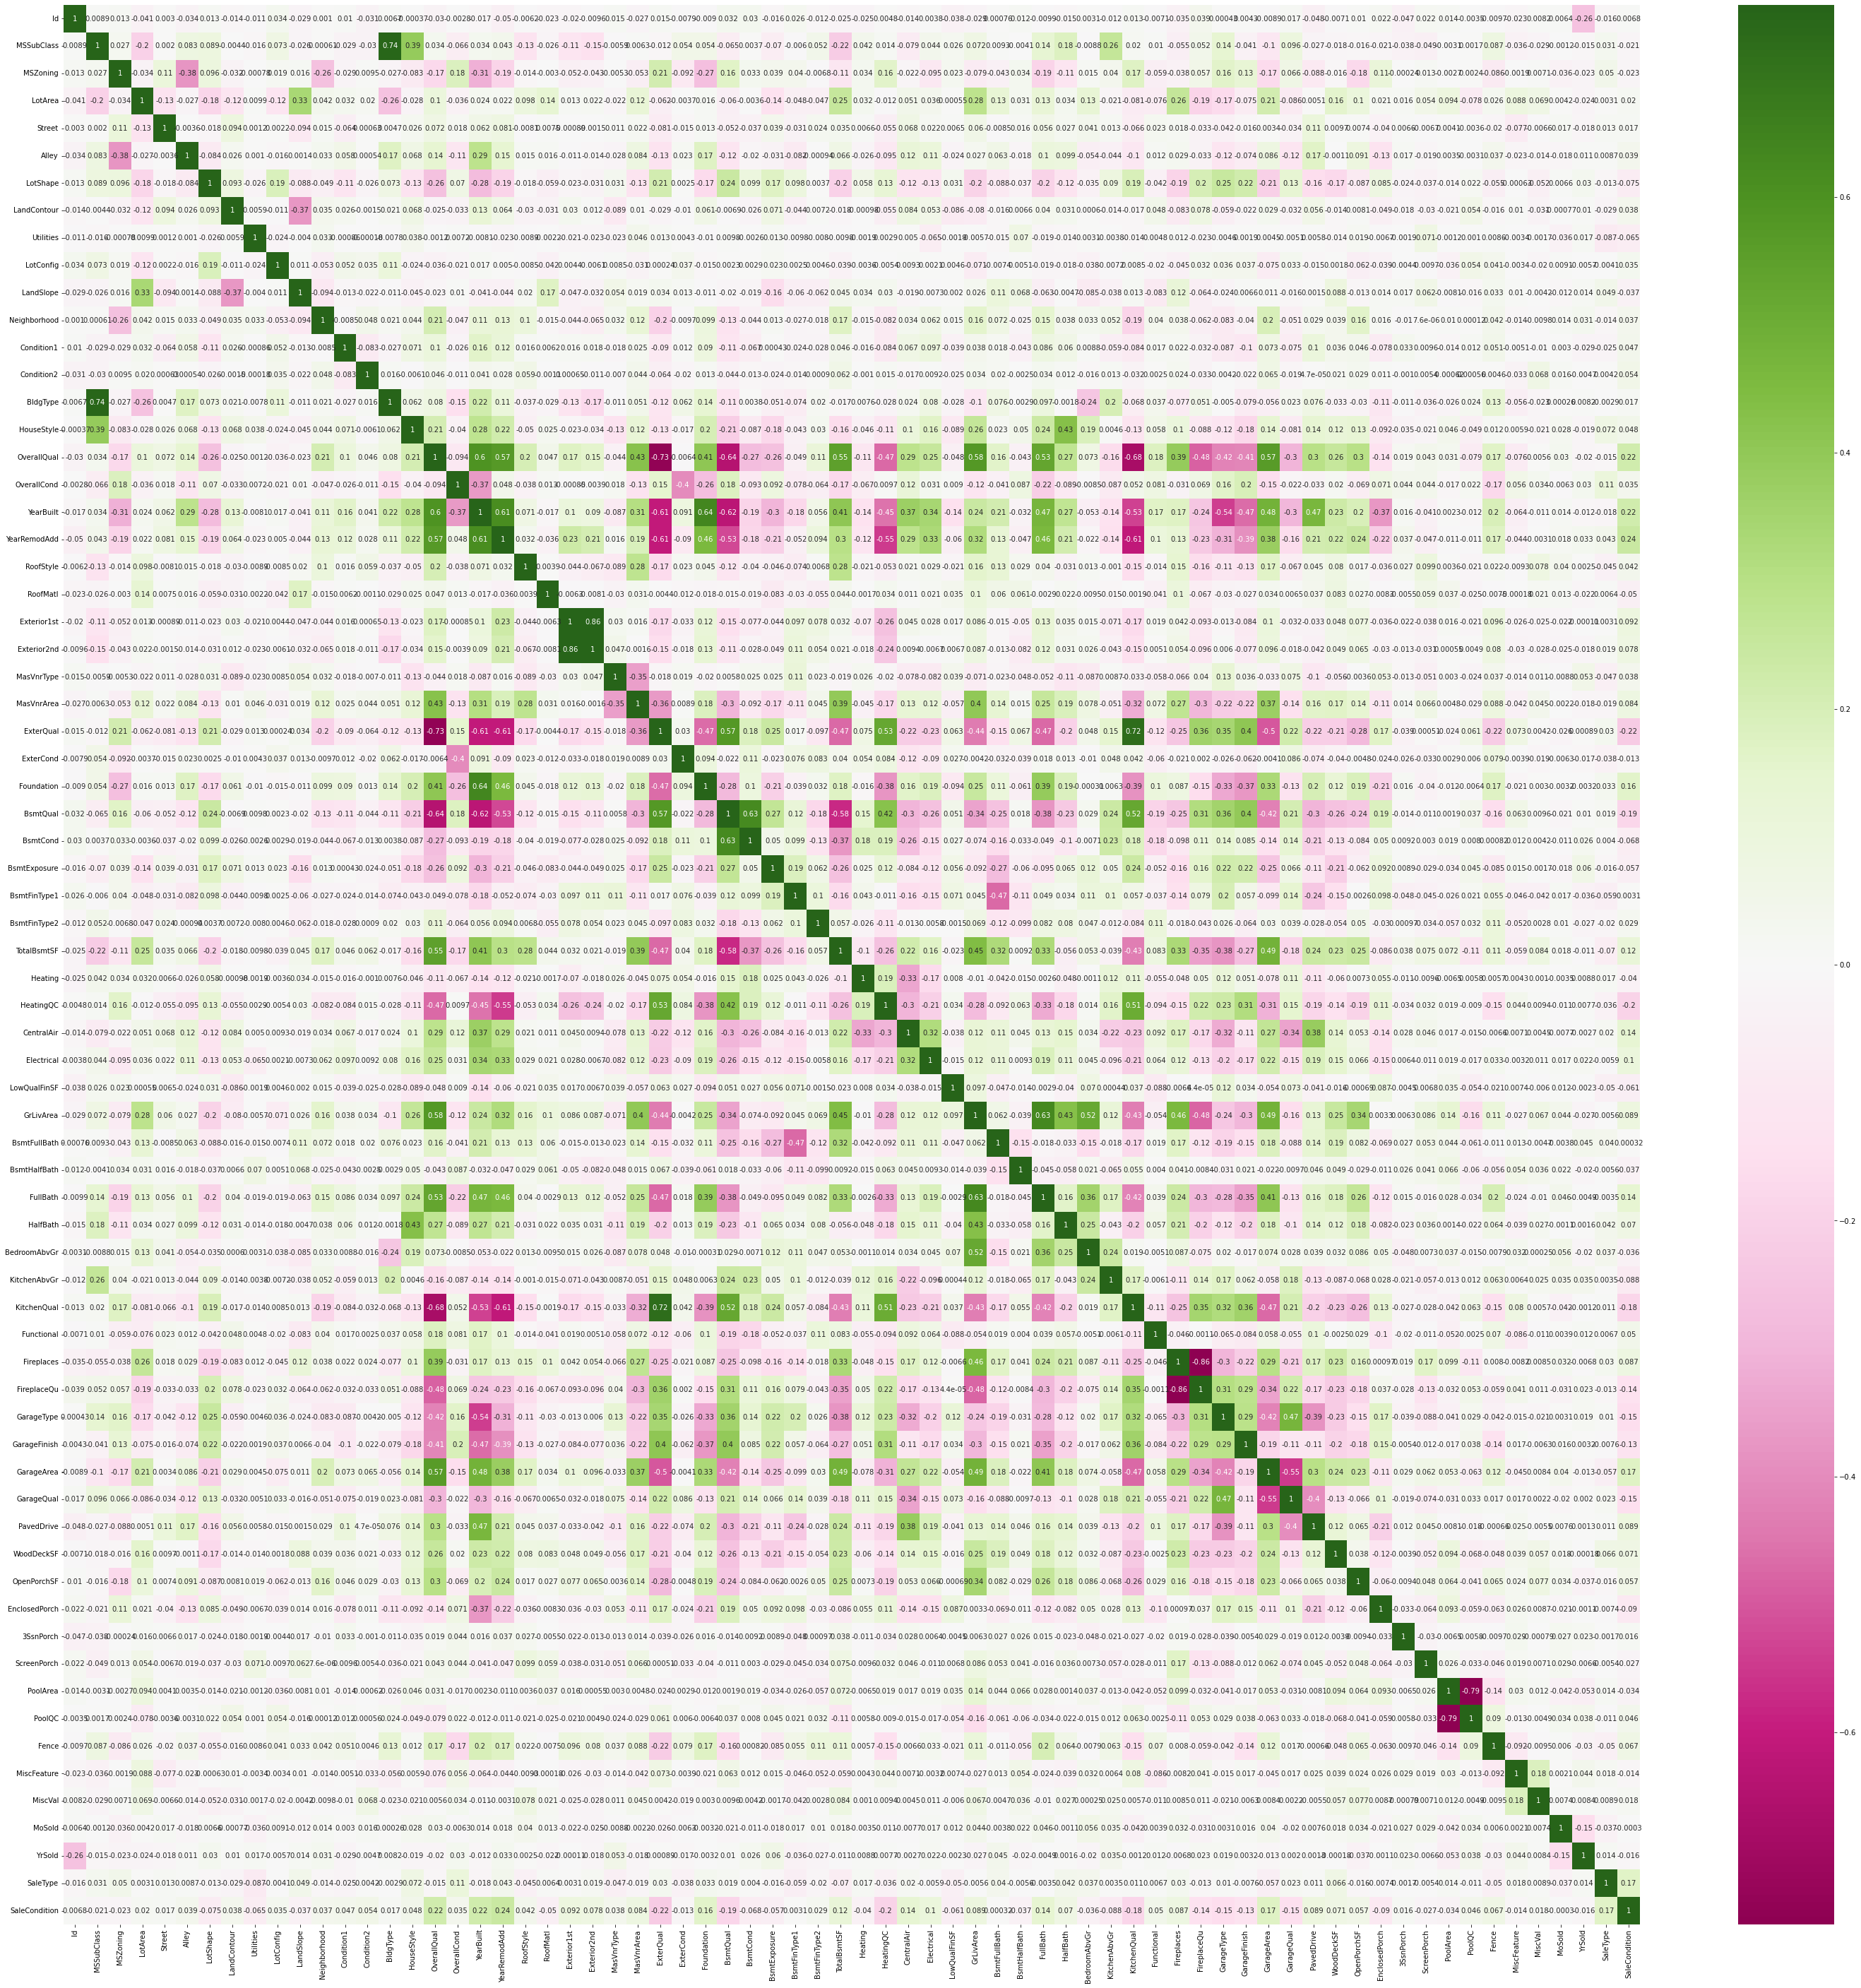

In [374]:
plt.figure(figsize=(50,50))
sns.heatmap(df.corr(), annot=True, cmap = 'PiYG', vmin= -0.75, vmax= 0.75)

In [375]:
# engineering correlated variables.
df["overallExteriorQC"] = (df["Exterior1st"] +df["Exterior2nd"]) / 2 

In [376]:
df.drop("BldgType", axis=1, inplace=True)

In [377]:
df.drop("PoolQC", axis=1, inplace=True)

In [378]:
len(df.columns)

69

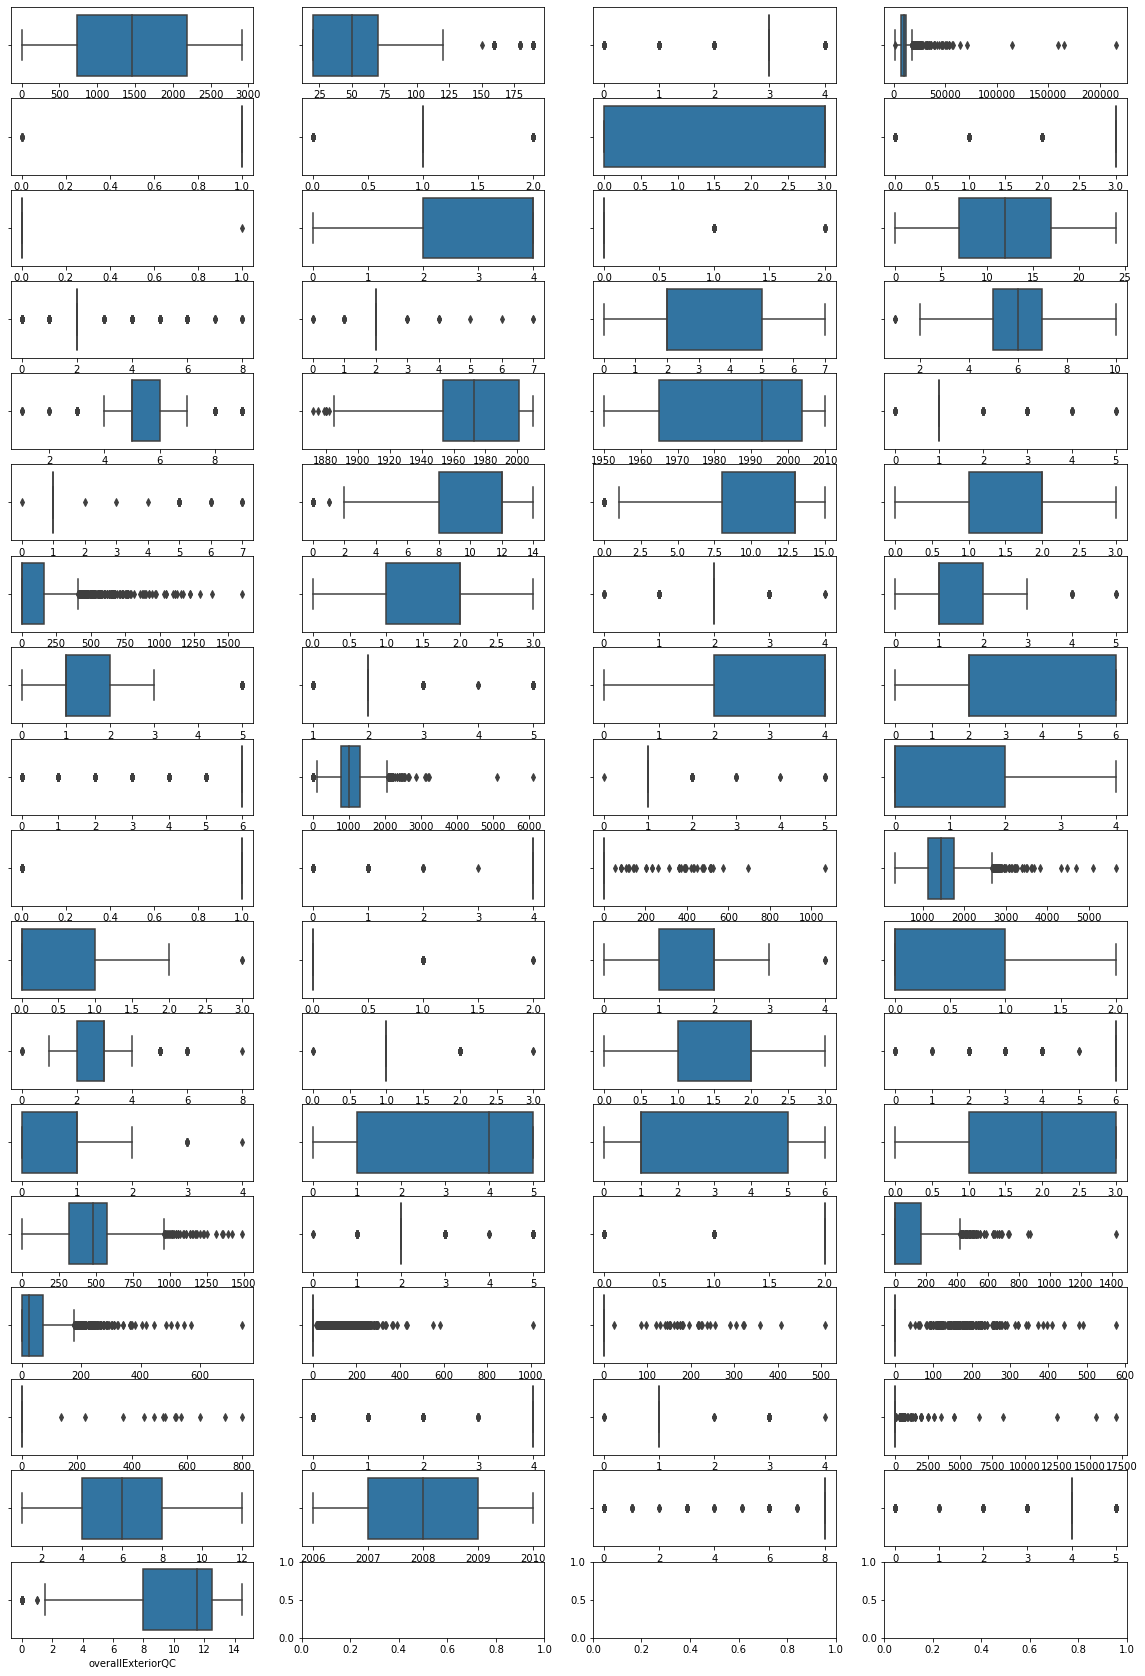

In [379]:
fig, ax = plt.subplots(nrows = 18, ncols= 4, figsize=(20, 30))

for i, subplot in zip(df.columns,  ax.flatten()):
    sns.boxplot(df[i], ax=subplot)
plt.show()

In [380]:
from sklearn.preprocessing import power_transform
transformed = power_transform(df, method='yeo-johnson')
df_transformed = pd.DataFrame(data=transformed, columns= df.columns)

In [381]:
# Z-scale Standardization

In [382]:
from sklearn.preprocessing import StandardScaler
ssc = StandardScaler()
x_standardized = ssc.fit_transform(df_transformed)

In [383]:
df_standard = pd.DataFrame(data=x_standardized, columns= df_transformed.columns)

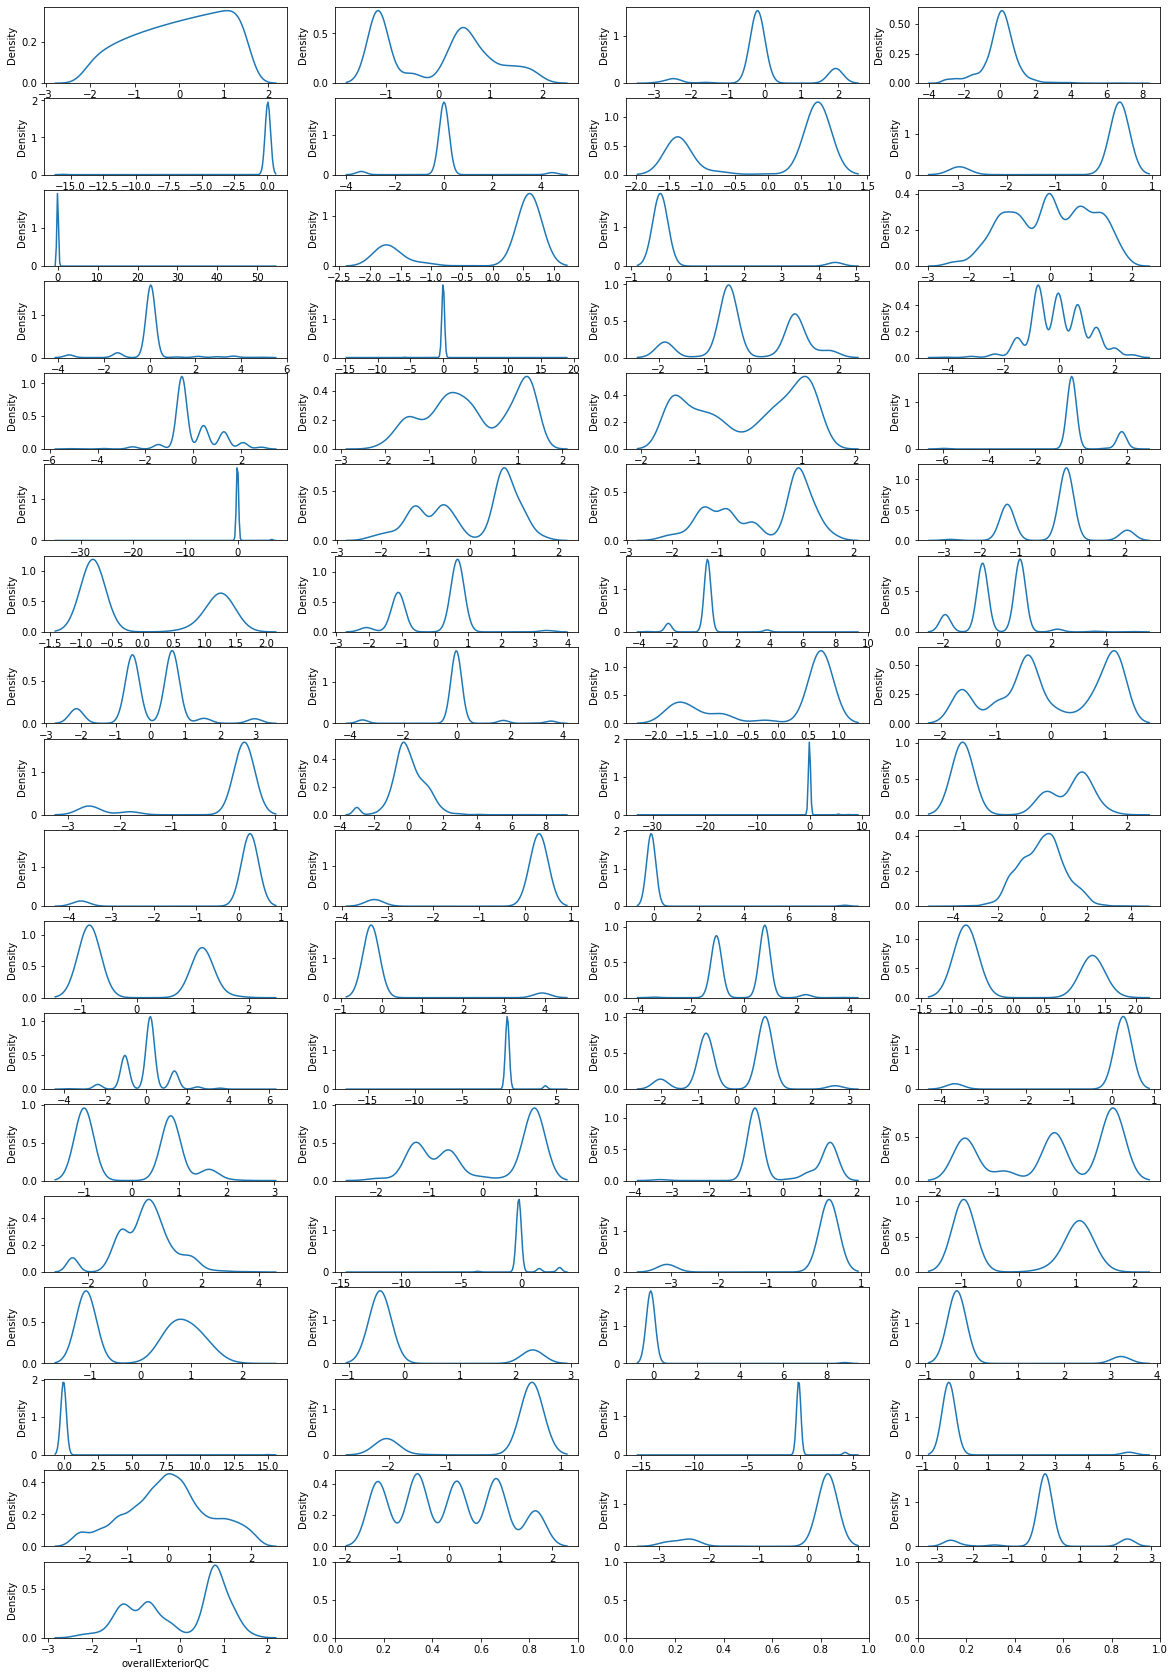

In [384]:
fig, ax = plt.subplots(nrows = 18, ncols= 4, figsize=(20, 30))

for i, subplot in zip(df_standard.columns,  ax.flatten()):
    sns.kdeplot(df_standard[i], ax=subplot)
plt.show()

In [385]:
X_train = df_standard[:1460]
X_test = df_standard[1460:]

In [386]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
ytrainpred = rfr.predict(X_train)
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_train, ytrainpred, squared=False)
print(rmse)

11245.512730067047


In [387]:
from xgboost import XGBRegressor
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)
ytrainpred = xgbr.predict(X_train)
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_train, ytrainpred, squared=False)
print(rmse)

1580.5475101517582


In [388]:
from xgboost import XGBRegressor
xgbr = XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, n_estimators=900,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
xgbr.fit(X_train, y_train)
ytrainpred = xgbr.predict(X_train)
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_train, ytrainpred, squared=False)
print(rmse)

[00:47:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[00:47:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


10925.091706175926


In [389]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
ytrainpred = logreg.predict(X_train)
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_train, ytrainpred, squared=False)
print(rmse)

4874.829817893611


In [390]:
testpred = logreg.predict(X_test)

In [391]:
testsub = pd.DataFrame(data= {"id":range(1461, 2920), "SalePrice":(testpred)})
testsub.to_csv("sublogreg.csv", index=False)